# Decision trees for regression

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import utils
import matplotlib.pyplot as plt

In [4]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,7,1,2,1,5,4]

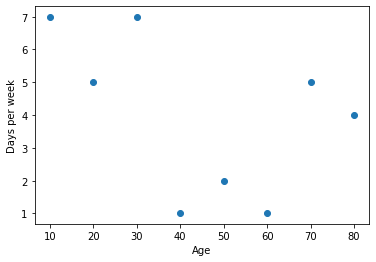

In [5]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [6]:
dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(features, labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

/Users/luisserrano/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


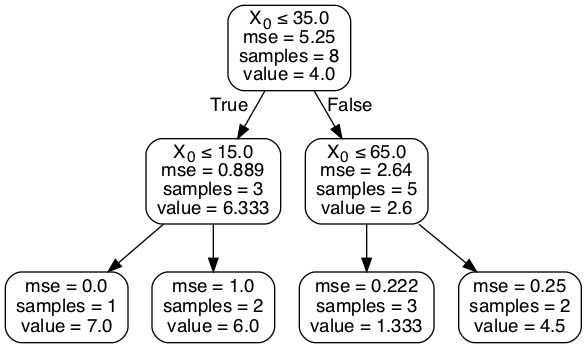

In [7]:
utils.display_tree(dt_regressor)

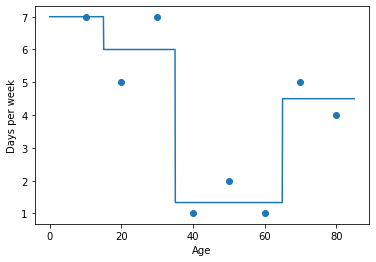

In [8]:
utils.plot_regressor(dt_regressor, features, labels)

# Finding the first split by mimizing the MSE

In [9]:
for i in range(0,9):
    left = np.array(labels[:i])
    right = np.array(labels[i:])
    print("*****")
    print(left, right)
    print(np.mean(left), np.mean(right))
    left_tse = left-np.mean(left)
    right_tse = right-np.mean(right)
    print(1/8*(np.dot(left_tse, left_tse) + np.dot(right_tse, right_tse)))

*****
[] [7 5 7 1 2 1 5 4]
nan 4.0
5.25
*****
[7] [5 7 1 2 1 5 4]
7.0 3.5714285714285716
3.9642857142857144
*****
[7 5] [7 1 2 1 5 4]
6.0 3.3333333333333335
3.916666666666667
*****
[7 5 7] [1 2 1 5 4]
6.333333333333333 2.6
1.9833333333333334
*****
[7 5 7 1] [2 1 5 4]
5.0 3.0
4.25
*****
[7 5 7 1 2] [1 5 4]
4.4 3.3333333333333335
4.983333333333333
*****
[7 5 7 1 2 1] [5 4]
3.8333333333333335 4.5
5.166666666666667
*****
[7 5 7 1 2 1 5] [4]
4.0 4.0
5.25
*****
[7 5 7 1 2 1 5 4] []
4.0 nan
5.25


/Users/luisserrano/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/luisserrano/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
1/8*(
    (7-3.833)**2 +
    (5-3.833)**2 +
    (7-3.833)**2 +
    (1-3.833)**2 +
    (2-3.833)**2 +
    (1-3.833)**2 +
    (5-4.5)**2 +
    (4-4.5)**2)

5.16666675

In [13]:
np.array([7,5,7,1,2,1,5,4]).mean()

4.0